In [1]:
from sklearn.decomposition import PCA
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy

# Load the data
# Downloaded data from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE152075
# Data was read in R and transformed into a txt file 

X = np.loadtxt('/Users/stanleyyang/Math104/rawCounts.txt', )
# X.shape
# X = np.random.rand(2000,2000)

In [25]:
# Use the SVD to create a rank N approximation of the matrix
def rank_n_approximation(mtx, rank_n):
    SVD = np.linalg.svd(mtx, full_matrices=False)
    u, s, v = SVD
    Ar = np.zeros((len(u), len(v)))
    for i in range(rank_n):
        Ar += s[i] * np.outer(u.T[i], v[i])
    return Ar

def run_PCA_analysis(mat, component):
    pca = PCA(n_components=3)
    mat = np.asarray(mat)
    pca.fit(mat) 
    
    # print("Printing PC1")
    # print(pca.components_[0])
    pc1 = pca.components_[0]
    # print('')
    # print("Printing PC2")
    pc2 = pca.components_[1]
    # print(pca.components_[1])
    # print('')
    # print("Printing PC3")
    pc3 = pca.components_[2]
    # print(pca.components_[2])
    # print('')
    # result_mat = np.matrix([pc1, pc2, pc3])
    result_mat = np.matrix([pca.components_[component]])

    print(result_mat)
    return(result_mat)

In [27]:
mat = np.matrix([[1, 4, 3], [5, 2, 3], [1, 2, 4]])

def analyze_PCA_approximations(mat, component):
    rank = len(mat)
    # Run PCA analysis on original matrix
    initial_vector = run_PCA_analysis(mat, component)
    final_list = []
    # Run PCA analysis on rank n approximations of matrix
    for r in range(1, min(rank + 1, 10)):
        approx = rank_n_approximation(mat, r)
        print('Printing rank ' + str(r) + ' approximation PCA componnts....')
        print('')
        print('')
        final_list.append(run_PCA_analysis(approx, component))
    return initial_vector, final_list

initial_vector, final_list = analyze_PCA_approximations(mat, 0)
initial_vector, final_list

[[ 0.95531474 -0.27827157 -0.0996929 ]]
Printing rank 1 approximation PCA componnts....


[[0.51769453 0.53517292 0.66751952]]
Printing rank 2 approximation PCA componnts....


[[ 0.95282972 -0.29001234 -0.0894895 ]]
Printing rank 3 approximation PCA componnts....


[[ 0.95531474 -0.27827157 -0.0996929 ]]


(matrix([[ 0.95531474, -0.27827157, -0.0996929 ]]),
 [matrix([[0.51769453, 0.53517292, 0.66751952]]),
  matrix([[ 0.95282972, -0.29001234, -0.0894895 ]]),
  matrix([[ 0.95531474, -0.27827157, -0.0996929 ]])])

In [28]:
# Code to test another matrix low rank method, not used in paper
def readAndProcessData():
    """
        Function to read the raw text file into a dataframe and keeping the 
        population, gender separate from the genetic data
        
        We also calculate the population mode for each attribute or trait (columns)
        Note that mode is just the most frequently occuring trait
        
        return: dataframe (df), modal traits (modes), population and gender for each individual row
    """
    
    df = pd.read_csv('/Users/stanleyyang/PCA-genome-data/p4dataset2020.txt', header=None, delim_whitespace=True)
    gender = df[1]
    population = df[2]
    
    df.drop(df.columns[[0, 1, 2]],axis=1,inplace=True)
    modes = np.array(df.mode().values[0,:])
    return df, modes, population, gender
    
df, modes, population, gender = readAndProcessData()

def convertDfToMatrix(df, mode):
    """
        Create a binary matrix (binarized) representing mutations away from mode
        Each row is for an individual, and each column is a trait
        
        binarized_{i,j}= 0 if the $i^{th}$ individual has column 
        $j$’s mode nucleobase for his or her $j^{th}$ nucleobase, 
        and binarized_{i,j}= 1 otherwise
    """
    
    raw_np = df.to_numpy()
    binarized = np.where(raw_np!=modes, 1, 0)
    return binarized

# X = convertDfToMatrix(df, modes)


In [29]:
print(X.shape)
X = X[:2000, :]
print(X.shape)
#X_under = X[:484,:]
# print(X_under.shape)

(1000, 1000)
(1000, 1000)


In [32]:
def squarify(M,val):
    (a,b)=M.shape
    if a>b:
        padding=((0,0),(0,a-b))
    else:
        padding=((0,b-a),(0,0))
    return np.pad(M,padding,mode='constant',constant_values=val)

# Pad the square matrix

X = squarify(X, 0)
initial_vector, final_list = analyze_PCA_approximations(squarify(X, 0), 2)

[[ 4.95635044e-03  1.33472141e-02  1.03659473e-02  2.75623665e-03
   2.32960514e-02  4.76562370e-02  1.42469564e-02  5.41912089e-03
   2.89294314e-02  7.37227422e-03  2.70923852e-03  5.13253401e-03
   9.36821265e-03  4.91763124e-03 -2.61465917e-02  7.55338287e-03
   1.57943564e-03  4.22819267e-02  1.79676251e-02  5.94787074e-03
   1.06950110e-02  2.53757498e-03  4.06081523e-03  1.66031572e-02
   1.81400330e-03  4.73087183e-03  5.42364196e-03  1.24073027e-02
   4.83323843e-03  9.75471888e-04  5.17623425e-03  1.38912872e-03
   1.78900530e-02  2.00817228e-03  3.57508878e-03  9.63853432e-03
   6.89989583e-03  6.22354015e-04  1.04715300e-02  6.33686226e-03
   5.00783629e-03  6.89442733e-03  6.10912073e-03  1.32713192e-02
  -4.49873832e-03  1.15055800e-03 -2.78127316e-05  6.66922532e-03
  -2.20710139e-02 -2.25841419e-03 -4.67653215e-03 -8.46323456e-04
  -2.55496172e-03  1.48214515e-03  6.86699800e-04  4.94940162e-03
   2.11431485e-02  2.26245932e-03  3.94608402e-03  4.56946549e-03
  -4.20911

Printing rank 1 approximation PCA componnts....


[[-2.64152913e-03  6.58883214e-03  6.93263889e-04 -1.55998620e-03
  -3.07771958e-03  1.25801421e-02 -7.24341652e-03  5.80112894e-03
  -9.68090710e-03 -2.45835976e-03  1.21844317e-03 -3.34601493e-03
   8.42053693e-04 -3.39133445e-04  3.88556195e-02 -4.27768093e-03
   2.98213968e-04  3.25636288e-03 -5.95807798e-02  7.29136243e-03
  -4.37222679e-03  6.33675726e-05  4.17398414e-03 -1.70489862e-02
  -1.99432549e-03  2.00032085e-03 -6.05741752e-03 -1.01781759e-02
   2.36326712e-03  2.40040874e-04 -1.97510670e-03  3.78570918e-04
  -2.08936520e-02 -2.05488155e-03 -2.34230784e-03 -5.78660151e-03
   3.60778897e-03 -4.27919308e-04  1.11893299e-02 -6.43126619e-03
  -8.52805900e-03 -1.96746351e-04 -9.76524721e-04  6.17914847e-03
   1.66685355e-03 -2.01290839e-05 -2.41368227e-03  1.05756540e-03
   1.87229375e-02 -2.68497599e-03  7.96920988e-04 -1.71019141e-03
  -3.64841141e-03  4.86414955e-03  7.26811218e-03  6.20629797e-03
   1.39994332e-03  8.13855

Printing rank 2 approximation PCA componnts....


[[ 1.83739875e-03 -4.66380042e-03  7.63535614e-04 -2.86920098e-03
   1.61340268e-02 -2.43628976e-02 -4.73453450e-03 -7.67968040e-03
  -2.12930406e-02 -3.61586036e-04  1.01837097e-04 -4.90093049e-03
   4.54761478e-04 -1.56823624e-03 -3.07167667e-03 -1.01746049e-03
  -1.44011127e-03  4.46314912e-03 -6.62293204e-02  3.88347700e-03
   4.53412363e-03 -5.68167615e-04 -1.98396239e-03 -5.24202378e-03
  -3.83509822e-04  1.83750157e-03  1.83803810e-03  8.58802354e-03
   7.86382057e-03  6.38241701e-04 -2.45569671e-03 -6.34200779e-04
  -2.27725783e-02  2.17444490e-04 -5.36909754e-05  1.66506900e-03
  -2.06050250e-03 -2.86635973e-03  2.61412207e-03  1.80961047e-04
  -1.70449098e-03 -5.06744414e-03 -3.86639263e-03 -6.08459116e-03
  -2.59675984e-03 -1.93072244e-03 -8.90991238e-03 -1.31575619e-03
  -1.36481480e-02 -4.79610267e-03 -5.69078996e-03  1.79860024e-03
  -3.18488140e-03 -1.58495115e-02 -6.81024931e-03 -6.13819292e-03
  -3.93168148e-03 -9.98480

Printing rank 3 approximation PCA componnts....


[[ 5.09633972e-03  1.38981965e-02  1.08207261e-02  2.95259218e-03
   2.37647429e-02  5.06509670e-02  1.48841911e-02  6.62252287e-03
   2.93938976e-02  7.55560091e-03  2.79721458e-03  5.65428616e-03
   9.53774310e-03  5.16156439e-03 -2.59680738e-02  7.88040613e-03
   1.60921904e-03  4.35518552e-02  1.80714546e-02  6.29463024e-03
   1.10279913e-02  2.58911318e-03  4.25022023e-03  1.70278833e-02
   1.87398597e-03  5.00866091e-03  5.48198023e-03  1.28024000e-02
   5.76420831e-03  1.11651783e-03  5.23214807e-03  1.42550997e-03
   1.79672293e-02  2.04158772e-03  3.68014175e-03  9.90057201e-03
   7.06010449e-03  6.84991588e-04  1.11642470e-02  6.45195535e-03
   5.31589471e-03  7.12293195e-03  6.56543454e-03  1.35280311e-02
  -4.72358912e-03  1.41177649e-03  8.33846187e-06  6.94729192e-03
  -2.16743753e-02 -1.40650055e-03 -4.61265820e-03 -7.75487898e-04
  -1.72297640e-03  1.76651602e-03  1.07821625e-03  5.33168281e-03
   2.12111491e-02  2.59284

Printing rank 4 approximation PCA componnts....


[[ 4.92953497e-03  1.34595065e-02  1.03845651e-02  2.72799658e-03
   2.32074577e-02  4.75834292e-02  1.38880198e-02  6.02827737e-03
   2.86965514e-02  7.35568439e-03  2.72480635e-03  5.12637376e-03
   9.28885513e-03  5.02571815e-03 -2.62271271e-02  7.53591962e-03
   1.56058596e-03  4.20560927e-02  1.76698005e-02  5.94887203e-03
   1.06151879e-02  2.53237060e-03  3.98255741e-03  1.64085259e-02
   1.83056694e-03  4.68918367e-03  5.37860324e-03  1.23579138e-02
   5.08506644e-03  1.04609407e-03  5.17415124e-03  1.39423259e-03
   1.76883075e-02  1.98013159e-03  3.51271069e-03  9.61449517e-03
   6.83698926e-03  6.49635514e-04  1.05628293e-02  6.23256103e-03
   4.97058864e-03  6.94080923e-03  6.31769186e-03  1.33178315e-02
  -4.59877771e-03  1.32113000e-03 -5.53008205e-05  6.66003703e-03
  -2.21284186e-02 -1.67796814e-03 -4.66358070e-03 -8.35949081e-04
  -1.99615939e-03  1.29537313e-03  6.73007654e-04  4.93545181e-03
   2.10928458e-02  2.42774

Printing rank 5 approximation PCA componnts....


[[ 4.92698383e-03  1.34252074e-02  1.03768760e-02  2.72462663e-03
   2.31911406e-02  4.76524444e-02  1.38879593e-02  5.98987013e-03
   2.86673583e-02  7.34317856e-03  2.72243054e-03  5.13688786e-03
   9.27972183e-03  5.01894536e-03 -2.63272492e-02  7.53184543e-03
   1.55882691e-03  4.20186814e-02  1.74952331e-02  5.92596021e-03
   1.05891963e-02  2.53066027e-03  3.98430251e-03  1.64023139e-02
   1.82853486e-03  4.69696079e-03  5.36963330e-03  1.23386314e-02
   5.07048110e-03  1.03718697e-03  5.16343679e-03  1.39077615e-03
   1.76267658e-02  1.99266581e-03  3.51212442e-03  9.61212185e-03
   6.82395742e-03  6.39869514e-04  1.05673778e-02  6.21233042e-03
   4.97634896e-03  6.93803605e-03  6.31112711e-03  1.33047661e-02
  -4.61183595e-03  1.31390441e-03 -5.73317818e-05  6.65438013e-03
  -2.21330757e-02 -1.73046612e-03 -4.67190489e-03 -8.38233166e-04
  -2.04526088e-03  1.28405244e-03  6.52268568e-04  4.93608542e-03
   2.10407552e-02  2.40900

Printing rank 6 approximation PCA componnts....


[[ 4.95936610e-03  1.32605448e-02  1.03923687e-02  2.71959338e-03
   2.32290236e-02  4.78729145e-02  1.41256041e-02  5.65755083e-03
   2.87267022e-02  7.36674935e-03  2.71570242e-03  5.24094388e-03
   9.29407967e-03  4.90403951e-03 -2.65134772e-02  7.55041872e-03
   1.57341851e-03  4.19541096e-02  1.77107426e-02  5.93099191e-03
   1.05907840e-02  2.53459275e-03  4.05344149e-03  1.64375145e-02
   1.80637706e-03  4.72764376e-03  5.39013477e-03  1.23369443e-02
   4.69705683e-03  9.72096173e-04  5.15785614e-03  1.39596900e-03
   1.76551445e-02  1.98910436e-03  3.55790294e-03  9.62815184e-03
   6.89048064e-03  6.35846904e-04  1.05868849e-02  6.28715681e-03
   5.03932584e-03  6.92966302e-03  6.26688751e-03  1.32448805e-02
  -4.47589721e-03  1.24344090e-03 -3.10148447e-05  6.68677583e-03
  -2.21104961e-02 -2.27553257e-03 -4.67453530e-03 -8.40728510e-04
  -2.65253137e-03  1.37122864e-03  7.60421374e-04  4.97938896e-03
   2.10348832e-02  2.33902

Printing rank 7 approximation PCA componnts....


[[ 4.93051339e-03  1.32534503e-02  1.03711228e-02  2.71527717e-03
   2.32483871e-02  4.77299683e-02  1.41842262e-02  5.51846240e-03
   2.87826988e-02  7.37337486e-03  2.70674031e-03  5.17198613e-03
   9.29518838e-03  4.90430435e-03 -2.64719925e-02  7.53145688e-03
   1.58326595e-03  4.17933585e-02  1.77083490e-02  5.92776651e-03
   1.05988339e-02  2.53015400e-03  4.04475968e-03  1.65273132e-02
   1.80591258e-03  4.74907710e-03  5.40167475e-03  1.23619740e-02
   4.80238994e-03  9.71382007e-04  5.14851435e-03  1.39390914e-03
   1.76676104e-02  2.00532492e-03  3.56565465e-03  9.61721058e-03
   6.86644419e-03  6.33877622e-04  1.05058253e-02  6.31101635e-03
   4.99908807e-03  6.90552971e-03  6.24227793e-03  1.32251178e-02
  -4.49558208e-03  1.23727842e-03 -4.17930559e-05  6.65820167e-03
  -2.20784971e-02 -2.21343858e-03 -4.67969690e-03 -8.48736041e-04
  -2.60386087e-03  1.38130451e-03  6.67529506e-04  4.97566135e-03
   2.10743134e-02  2.34576

Printing rank 8 approximation PCA componnts....


[[ 4.92202747e-03  1.32551861e-02  1.03584159e-02  2.71694768e-03
   2.32384543e-02  4.77921101e-02  1.42006339e-02  5.52383932e-03
   2.87722928e-02  7.37697367e-03  2.70801646e-03  5.13947924e-03
   9.30113461e-03  4.90375899e-03 -2.64513509e-02  7.52941480e-03
   1.58347319e-03  4.18130655e-02  1.77225827e-02  5.93253355e-03
   1.06059417e-02  2.53020773e-03  4.04831362e-03  1.65289115e-02
   1.80769265e-03  4.75338243e-03  5.40457619e-03  1.23709300e-02
   4.80461632e-03  9.71965600e-04  5.14375177e-03  1.39432543e-03
   1.76731799e-02  2.00312106e-03  3.56346606e-03  9.61489604e-03
   6.85301026e-03  6.35804717e-04  1.04962754e-02  6.30958457e-03
   4.98717015e-03  6.90660160e-03  6.24452409e-03  1.32247978e-02
  -4.49675658e-03  1.23689459e-03 -4.58131095e-05  6.65013136e-03
  -2.20874559e-02 -2.22035800e-03 -4.68109264e-03 -8.52810951e-04
  -2.60963911e-03  1.36713899e-03  6.35598963e-04  4.96299632e-03
   2.10739021e-02  2.34332

Printing rank 9 approximation PCA componnts....


[[ 4.92460292e-03  1.32552288e-02  1.03593676e-02  2.72116107e-03
   2.32306965e-02  4.77575516e-02  1.41881353e-02  5.49053181e-03
   2.87697142e-02  7.37558600e-03  2.70756366e-03  5.14737737e-03
   9.30499424e-03  4.90899765e-03 -2.64380831e-02  7.53085756e-03
   1.58310680e-03  4.18057713e-02  1.77341229e-02  5.94220407e-03
   1.06075823e-02  2.53000652e-03  4.04546323e-03  1.65193937e-02
   1.80959529e-03  4.75070893e-03  5.40452849e-03  1.23753773e-02
   4.79992766e-03  9.71081311e-04  5.14705366e-03  1.39486699e-03
   1.76712423e-02  2.00100674e-03  3.56213947e-03  9.61072212e-03
   6.85840894e-03  6.37271687e-04  1.04930902e-02  6.30817195e-03
   4.98634191e-03  6.90605569e-03  6.23909319e-03  1.32230054e-02
  -4.50212895e-03  1.23496731e-03 -4.52481506e-05  6.65030301e-03
  -2.20911977e-02 -2.23331008e-03 -4.68008251e-03 -8.52019113e-04
  -2.61332509e-03  1.36340655e-03  6.37534709e-04  4.96448231e-03
   2.10746418e-02  2.33377

Cosine similiarities
0.4179186387618226
0.6533827108928254
0.9998857604564191
0.9999788683439238
0.9999797896804039
0.9999930011937799
0.9999955166236716
0.9999956166832783
0.9999956700875351


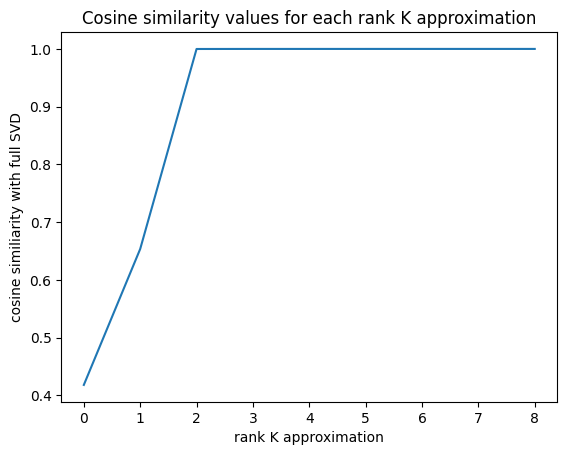

In [33]:
def cos_sim(a, b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

print("Cosine similiarities")

cosine_similiarities = []
for vector in final_list:
    cosine_similarity = cos_sim(np.squeeze(np.asarray(initial_vector)), np.squeeze(np.asarray(vector)))
    print(cosine_similarity)
    cosine_similiarities.append(cosine_similarity)
    
import matplotlib.pyplot as plt

x_axis = range(len(final_list))
y_axis = cosine_similiarities

plt.plot(x_axis, y_axis)
plt.title('Cosine similarity values for each rank K approximation')
plt.xlabel('rank K approximation')
plt.ylabel('cosine similiarity with full SVD')
plt.show()

In [ ]:
# X = B
# X = squarify(X, 0)
# num = 1000
# X = X[0:num,0:num]
# analyze_PCA_approximations(squarify(X, 0))